# Problem 2: CART-RF-ANN
## An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.


In [2]:
data = pd.read_csv('insurance_part2_data.csv')

In [3]:
data.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [7]:
data = data.drop(['Agency_Code'], axis=1)
data

,Age,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
...,...,...,...,...,...,...,...,...,...
2995,28,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Checking the information about data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Type          3000 non-null   object 
 2   Claimed       3000 non-null   object 
 3   Commision     3000 non-null   float64
 4   Channel       3000 non-null   object 
 5   Duration      3000 non-null   int64  
 6   Sales         3000 non-null   float64
 7   Product Name  3000 non-null   object 
 8   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 211.1+ KB


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Checking the Dimension of data

In [9]:
data.shape

(3000, 9)

<span style="font-family: Arial; font-weight:bold;font-size:1.7em;color:#00b3e5;">Descriptive Statistics

In [10]:
#Mean

data[['Age','Commision','Duration','Sales']].mean()

Age          38.091000
Commision    14.529203
Duration     70.001333
Sales        60.249913
dtype: float64

In [11]:
#Median

data[['Age','Commision','Duration','Sales']].median()

Age          36.00
Commision     4.63
Duration     26.50
Sales        33.00
dtype: float64

In [12]:
#Mode

data[['Age','Commision','Duration','Sales']].mode()

,Age,Commision,Duration,Sales
0,36,0.0,8,20.0


In [13]:
#Quantile 25%

print('data_quantile(25%):',data[['Age','Commision','Duration','Sales']].quantile(q=0.25))

data_quantile(25%): Age          32.0
Commision     0.0
Duration     11.0
Sales        20.0
Name: 0.25, dtype: float64


In [14]:
#Quantile 50%

print('data_quantile(50%):',data[['Age','Commision','Duration','Sales']].quantile(q=0.5))

data_quantile(50%): Age          36.00
Commision     4.63
Duration     26.50
Sales        33.00
Name: 0.5, dtype: float64


In [15]:
#Quantile 75%

print('data_quantile(75%):',data[['Age','Commision','Duration','Sales']].quantile(q=0.75))

data_quantile(75%): Age          42.000
Commision    17.235
Duration     63.000
Sales        69.000
Name: 0.75, dtype: float64


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Checking the Measures of Dispersion

In [16]:
# IQR

data[['Age','Commision','Duration','Sales']].quantile(0.75)-data[['Age','Commision','Duration','Sales']].quantile(0.25)

Age          10.000
Commision    17.235
Duration     52.000
Sales        49.000
dtype: float64

In [17]:
#  Range

data[['Age','Commision','Duration','Sales']].max()-data[['Age','Commision','Duration','Sales']].min()

Age            76.00
Commision     210.21
Duration     4581.00
Sales         539.00
dtype: float64

In [18]:
#variance

data[['Age','Commision','Duration','Sales']].var()

Age            109.485214
Commision      649.304524
Duration     17970.290762
Sales         5003.292182
dtype: float64

In [19]:
#standard deviation

data[['Age','Commision','Duration','Sales']].std()

Age           10.463518
Commision     25.481455
Duration     134.053313
Sales         70.733954
dtype: float64

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Plotting the summary mean,mode,median using histogram

Mean:  38.091 
Median:  36.0 
Mode:  36


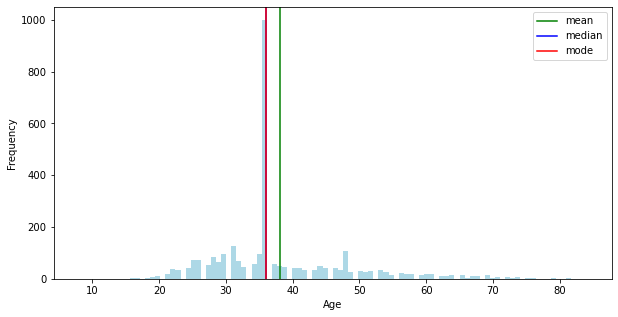

In [20]:
mean = data['Age'].mean()
median = data['Age'].median()
mode = data['Age'].mode()
print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5))
plt.hist(data['Age'],bins=100,color='lightblue') #plot histogram

# draw lines for mean,mode,median

plt.axvline(mean,color='green',label='mean')
plt.axvline(median,color='blue',label='median')
plt.axvline(mode[0],color='red',label='mode')

# label x axis

plt.xlabel('Age')

# label y axis

plt.ylabel('Frequency')

# plot legend

plt.legend()

plt.show()

Mean:  14.529203333333266 
Median:  4.63 
Mode:  0.0


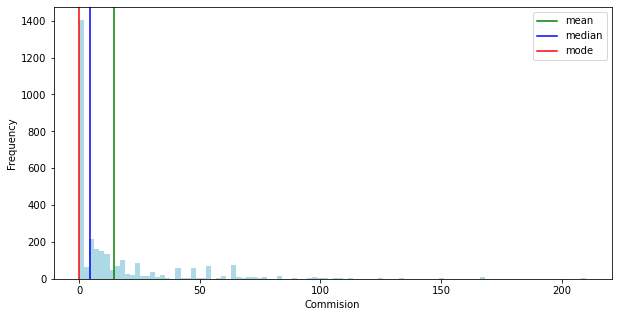

In [21]:
mean = data['Commision'].mean()
median = data['Commision'].median()
mode = data['Commision'].mode()
print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5))
plt.hist(data['Commision'],bins=100,color='lightblue') #plot histogram

# draw lines for mean,mode,median

plt.axvline(mean,color='green',label='mean')
plt.axvline(median,color='blue',label='median')
plt.axvline(mode[0],color='red',label='mode')

# label x axis

plt.xlabel('Commision')

# label y axis

plt.ylabel('Frequency')

# plot legend

plt.legend()

plt.show()

Mean:  70.00133333333333 
Median:  26.5 
Mode:  8


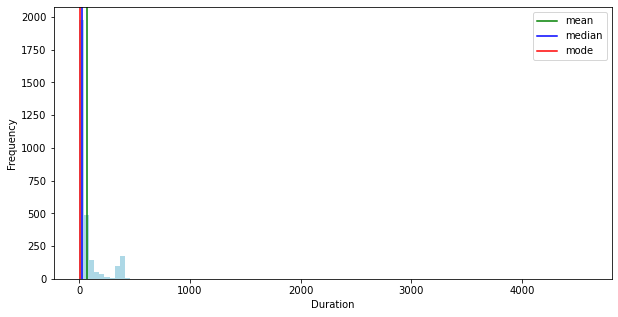

In [18]:
mean = data['Duration'].mean()
median = data['Duration'].median()
mode = data['Duration'].mode()
print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5))
plt.hist(data['Duration'],bins=100,color='lightblue') #plot histogram

# draw lines for mean,mode,median

plt.axvline(mean,color='green',label='mean')
plt.axvline(median,color='blue',label='median')
plt.axvline(mode[0],color='red',label='mode')

# label x axis

plt.xlabel('Duration')

# label y axis

plt.ylabel('Frequency')

# plot legend

plt.legend()

plt.show()

Mean:  60.24991333333344 
Median:  33.0 
Mode:  20.0


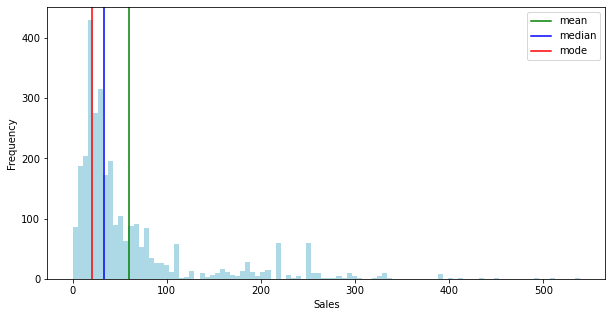

In [22]:
mean = data['Sales'].mean()
median = data['Sales'].median()
mode = data['Sales'].mode()
print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5))
plt.hist(data['Sales'],bins=100,color='lightblue') #plot histogram

# draw lines for mean,mode,median

plt.axvline(mean,color='green',label='mean')
plt.axvline(median,color='blue',label='median')
plt.axvline(mode[0],color='red',label='mode')

# label x axis

plt.xlabel('Sales')

# label y axis

plt.ylabel('Frequency')

# plot legend

plt.legend()

plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Checking pairwise distribution of the continuous variables

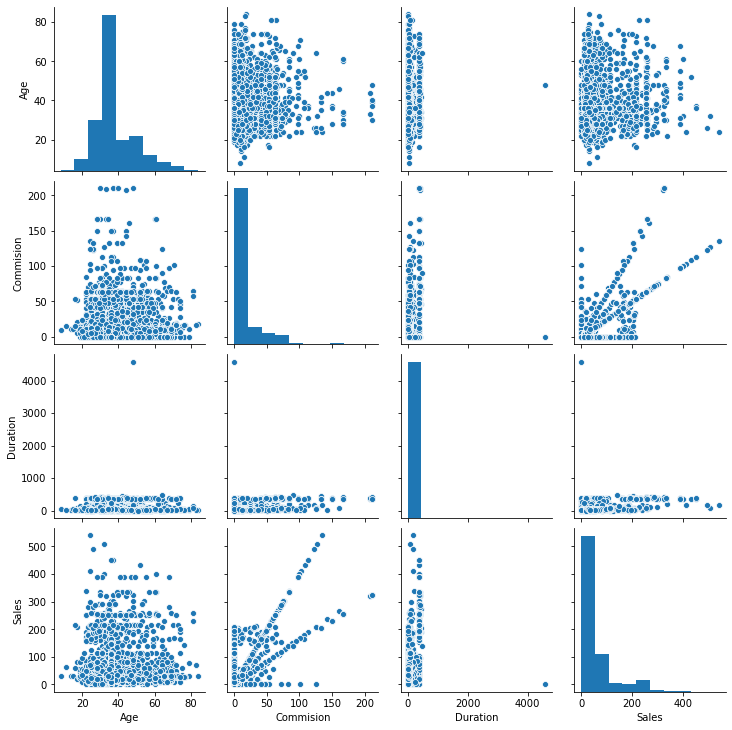

In [23]:
sns.pairplot(data[['Age','Commision','Duration','Sales']]);

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Checking Correlation

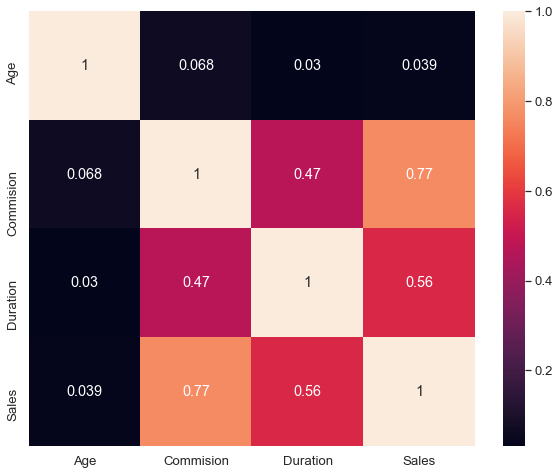

In [24]:
# heatmap with only continuous variables

plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(data[['Age','Commision','Duration','Sales']].corr(), annot=True)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Checking the Skewness 

In [25]:
data[['Age','Commision','Duration','Sales']].skew()

Age           1.149713
Commision     3.148858
Duration     13.784681
Sales         2.381148
dtype: float64

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Checking for null values

In [26]:
data.isnull().sum()

Age             0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

**There are no missing values**

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Summary of the data

In [27]:
data.describe(include="all")

,Age,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,2,2,NaN,2,NaN,NaN,5,3
top,NaN,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Checking for duplicate data

In [28]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
data[dups]

Number of duplicate rows = 139


,Age,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...
2940,36,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Removing Duplicates

In [29]:
data.drop_duplicates(inplace=True)

In [30]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(data.shape)

Number of duplicate rows = 0
(2861, 9)


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Checking for Outliers

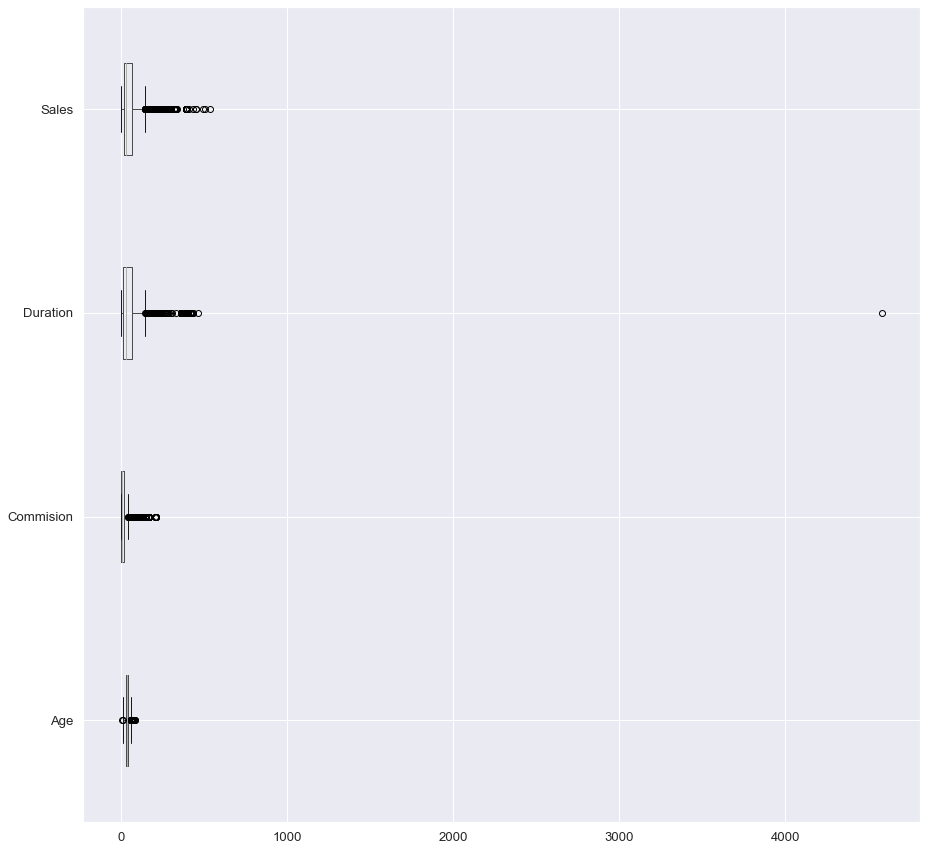

In [31]:
# construct box plot for continuous variables

plt.figure(figsize=(15,15))
data[['Age','Commision','Duration','Sales']].boxplot(vert=0)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Converting all objects to categorical codes

In [32]:
for feature in data.columns: 
    if data[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(data[feature].unique()))
        print(pd.Categorical(data[feature].unique()).codes)
        data[feature] = pd.Categorical(data[feature]).codes



feature: Type
[Airlines, Travel Agency]
Categories (2, object): [Airlines, Travel Agency]
[0 1]


feature: Claimed
[No, Yes]
Categories (2, object): [No, Yes]
[0 1]


feature: Channel
[Online, Offline]
Categories (2, object): [Offline, Online]
[1 0]


feature: Product Name
[Customised Plan, Cancellation Plan, Bronze Plan, Silver Plan, Gold Plan]
Categories (5, object): [Bronze Plan, Cancellation Plan, Customised Plan, Gold Plan, Silver Plan]
[2 1 0 4 3]


feature: Destination
[ASIA, Americas, EUROPE]
Categories (3, object): [ASIA, Americas, EUROPE]
[0 1 2]


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Type          2861 non-null   int8   
 2   Claimed       2861 non-null   int8   
 3   Commision     2861 non-null   float64
 4   Channel       2861 non-null   int8   
 5   Duration      2861 non-null   int64  
 6   Sales         2861 non-null   float64
 7   Product Name  2861 non-null   int8   
 8   Destination   2861 non-null   int8   
dtypes: float64(2), int64(2), int8(5)
memory usage: 125.7 KB


In [34]:
data.head()

,Age,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,1,0,0.00,1,34,20.00,2,0
2,39,1,0,5.94,1,3,9.90,2,1
3,36,1,0,0.00,1,4,26.00,1,0
4,33,0,0,6.30,1,53,18.00,0,0


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Proportion of 1s and 0s

In [35]:
data.Claimed.value_counts(normalize=True)

0    0.680531
1    0.319469
Name: Claimed, dtype: float64

There is no issue of class imbalance here as we have reasonable proportions in both the classes

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

### Extracting the target column into separate vectors for training set and test set

In [36]:
X = data.drop("Claimed", axis=1)

y = data.pop("Claimed")

X.head()

,Age,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0.70,1,7,2.51,2,0
1,36,1,0.00,1,34,20.00,2,0
2,39,1,5.94,1,3,9.90,2,1
3,36,1,0.00,1,4,26.00,1,0
4,33,0,6.30,1,53,18.00,0,0


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Splitting data into training and test set

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Checking the dimensions of the training and test data

In [38]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2002, 8)
X_test (859, 8)
train_labels (2002,)
test_labels (859,)


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Building a Decision Tree Classifier

In [39]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [41]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=450,
                       random_state=1)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Generating Tree

In [42]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

http://webgraphviz.com/

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Variable Importance

In [43]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Product Name  0.905946
Sales         0.094054
Age           0.000000
Type          0.000000
Commision     0.000000
Channel       0.000000
Duration      0.000000
Destination   0.000000


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Predicting on Training and Test dataset

In [44]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Getting the Predicted Classes and Probs

In [45]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.690867,0.309133
1,0.935802,0.064198
2,0.313830,0.686170
3,0.690867,0.309133
4,0.690867,0.309133


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Model Evaluation

### AUC and ROC for the training data

AUC: 0.769


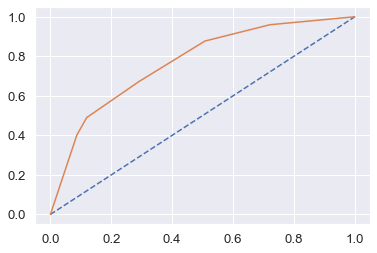

In [46]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

### AUC and ROC for the test data

AUC: 0.786


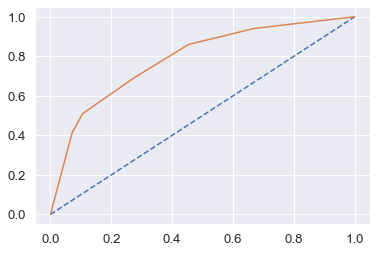

In [47]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

### Confusion Matrix for the training data

In [48]:
confusion_matrix(train_labels, ytrain_predict)

array([[1197,  162],
       [ 328,  315]])

### Train Data Accuracy

In [49]:
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.7552447552447552

In [50]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83      1359
           1       0.66      0.49      0.56       643

    accuracy                           0.76      2002
   macro avg       0.72      0.69      0.70      2002
weighted avg       0.74      0.76      0.74      2002



In [51]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.66
cart_train_recall  0.49
cart_train_f1  0.56


### Confusion Matrix for test data

In [52]:
confusion_matrix(test_labels, ytest_predict)

array([[526,  62],
       [133, 138]])

### Test Data Accuracy

In [53]:
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.7729918509895227

In [54]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       588
           1       0.69      0.51      0.59       271

    accuracy                           0.77       859
   macro avg       0.74      0.70      0.71       859
weighted avg       0.76      0.77      0.76       859



In [55]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.69
cart_test_recall  0.51
cart_test_f1  0.59


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Cart Conclusion

<b>Train Data:</b>  
    AUC: 77%        
    Accuracy: 76%             
    Precision: 66%        
    f1-Score: 56%       
            
<b>Test Data:</b>      
    AUC: 79%      
    Accuracy: 77%         
    Precision: 69%       
    f1-Score: 59%     
  
Training and Test set results are almost similar, and with the overall measures high, the model is a good model.  
Product Name is the most important variable for predicting claimed status

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Building a Random Forest Classifier

In [94]:
param_grid = {
    'max_depth': [20],
    'max_features': [7],
    'min_samples_leaf': [50],
    'min_samples_split': [60], 
    'n_estimators': [100] 
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [95]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [20], 'max_features': [7],
                         'min_samples_leaf': [50], 'min_samples_split': [60],
                         'n_estimators': [100]})

In [96]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': 7,
 'min_samples_leaf': 50,
 'min_samples_split': 60,
 'n_estimators': 100}

In [97]:
best_grid = grid_search.best_estimator_

In [98]:
best_grid

RandomForestClassifier(max_depth=20, max_features=7, min_samples_leaf=50,
                       min_samples_split=60, random_state=1)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Predicting the Training and Testing data

In [99]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">RF Model Performance Evaluation on Training data

In [100]:
confusion_matrix(train_labels,ytrain_predict)

array([[1249,  110],
       [ 362,  281]])

In [101]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.7642357642357642

In [85]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84      1359
           1       0.72      0.44      0.54       643

    accuracy                           0.76      2002
   macro avg       0.75      0.68      0.69      2002
weighted avg       0.76      0.76      0.75      2002



In [86]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.72
rf_train_recall  0.44
rf_train_f1  0.54


Area under Curve is 0.8232839763022165


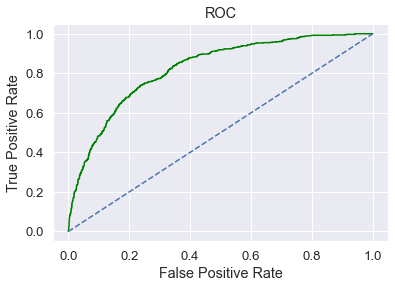

In [87]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">RF Model Performance Evaluation on Test data

In [88]:
confusion_matrix(test_labels,ytest_predict)

array([[541,  47],
       [156, 115]])

In [89]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.7636786961583236

In [90]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       588
           1       0.71      0.42      0.53       271

    accuracy                           0.76       859
   macro avg       0.74      0.67      0.69       859
weighted avg       0.76      0.76      0.74       859



In [91]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.71
rf_test_recall  0.42
rf_test_f1  0.53


Area under Curve is 0.8099348595526772


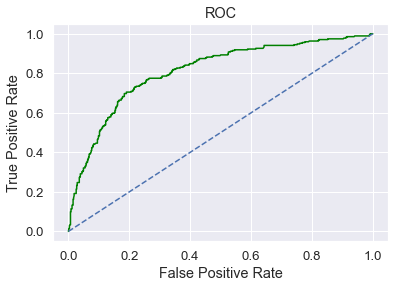

In [92]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

### Variable Importance

In [93]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Product Name  0.579863
Sales         0.174412
Commision     0.117403
Duration      0.053497
Age           0.043908
Type          0.026018
Destination   0.004898
Channel       0.000000


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Random Forest Conclusion

<b>Train Data:</b>  
    AUC: 82%        
    Accuracy: 76%           
    Precision: 72%        
    f1-Score: 54%       
            
<b>Test Data:</b>      
    AUC: 81%      
    Accuracy: 76%          
    Precision: 71%       
    f1-Score: 53%     
  
Training and Test set results are almost similar  
  
Product Name is again the most important variable for predicting claimed status

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Building a Neural Network Classifier

### Treating outliers

In [104]:
data.head()

,Age,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0.70,1,7,2.51,2,0
1,36,1,0.00,1,34,20.00,2,0
2,39,1,5.94,1,3,9.90,2,1
3,36,1,0.00,1,4,26.00,1,0
4,33,0,6.30,1,53,18.00,0,0


In [106]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age             12.00
Type             1.00
Commision       17.82
Channel          0.00
Duration        54.00
Sales           49.30
Product Name     1.00
Destination      0.00
dtype: float64


In [107]:
# Replace every outlier on the lower side by the lower whisker

for i, j in zip(np.where(data< Q1 - 1.5 * IQR)[0], np.where(data < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    data.iloc[i,j] = whisker[j]
    
    
#Replace every outlier on the upper side by the upper whisker 

for i, j in zip(np.where(data > Q3 + 1.5 * IQR)[0], np.where(data > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    data.iloc[i,j] = whisker[j]
    

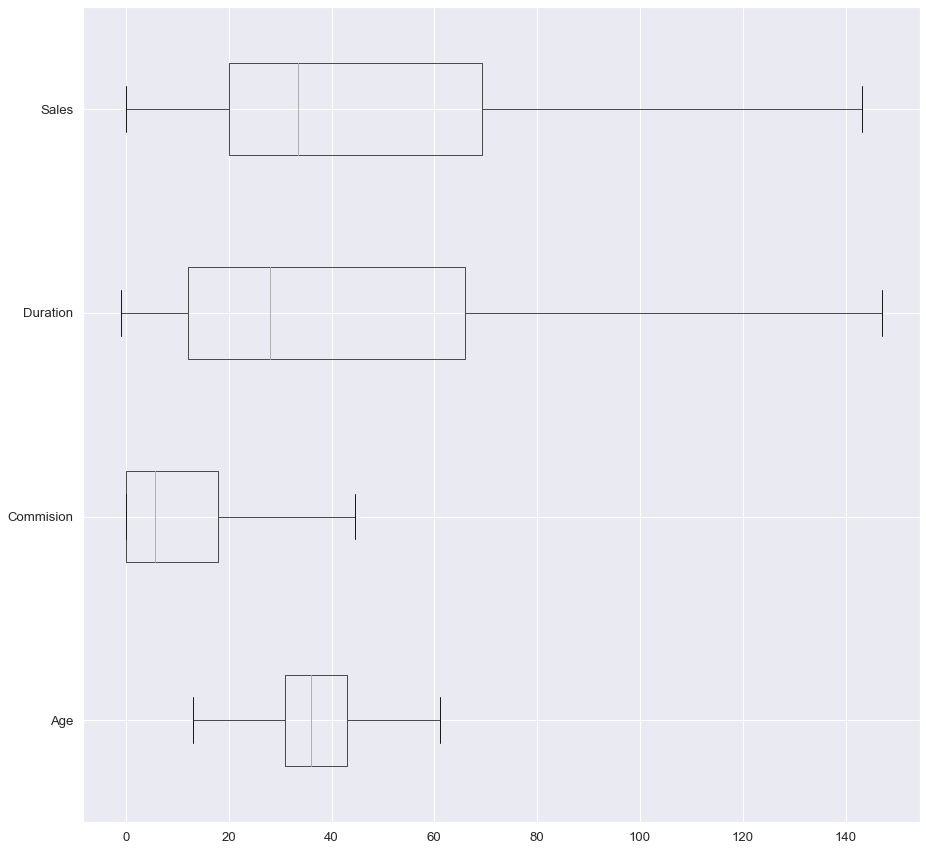

In [109]:
plt.figure(figsize=(15,15))
data[['Age','Commision','Duration','Sales']].boxplot(vert=0)

In [110]:
data.head()

,Age,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0.70,1.0,7.0,2.51,2.0,0.0
1,36.0,1,0.00,1.0,34.0,20.00,2.0,0.0
2,39.0,1,5.94,1.0,3.0,9.90,2.0,0.0
3,36.0,1,0.00,1.0,4.0,26.00,1.0,0.0
4,33.0,0,6.30,1.0,53.0,18.00,0.0,0.0


In [133]:
from sklearn.preprocessing import StandardScaler

In [134]:
sc = StandardScaler()

In [131]:
#### training data is fitted into the standard scaler and transformed

In [136]:
X_train = sc.fit_transform(X_train) 

In [ ]:
#X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [137]:
X_train

array([[ 2.88764239, -1.19813318, -0.35678995, ..., -0.65375471,
        -1.31338076, -0.44775345],
       [-0.21666128,  0.83463176, -0.58804207, ..., -0.37032806,
         0.24339146, -0.44775345],
       [ 2.04101412,  0.83463176,  1.01453513, ...,  0.11574864,
         0.24339146,  1.24676906],
       ...,
       [-0.21666128,  0.83463176, -0.58804207, ..., -0.68209737,
        -0.53499465, -0.44775345],
       [-0.21666128,  0.83463176, -0.58804207, ...,  0.72086453,
         0.24339146, -0.44775345],
       [-0.21666128,  0.83463176, -0.58804207, ...,  0.72086453,
         0.24339146,  1.24676906]])

scaling the test data. we should not do fit for test data. bcz we already fitted the train data and using the mean and std of the training data, we have to create or standardize the test data. to ensure that the scaling is uniform between training and testing

In [138]:
X_test = sc.transform(X_test)
X_test

array([[-0.68701032,  0.83463176, -0.58804207, ...,  0.50829455,
         0.24339146, -0.44775345],
       [ 2.79357258,  0.83463176, -0.58804207, ..., -0.45535606,
        -0.53499465, -0.44775345],
       [ 0.34775757, -1.19813318,  0.22134035, ...,  0.32406723,
         1.80016368, -0.44775345],
       ...,
       [ 1.19438584, -1.19813318, -0.43387399, ..., -0.63958338,
        -1.31338076, -0.44775345],
       [ 1.38252546,  0.83463176, -0.58804207, ..., -0.56872671,
         0.24339146, -0.44775345],
       [-0.21666128,  0.83463176, -0.58804207, ..., -0.56872671,
         0.24339146, -0.44775345]])

In [139]:
param_grid = {
    'hidden_layer_sizes': [100], # 50, 200
    'max_iter': [2500], #5000,2500
    'solver': ['adam'], #sgd
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [140]:
grid_search.fit(X_train, train_labels)
grid_search.best_params_
#{'hidden_layer_sizes': 100, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

{'hidden_layer_sizes': 100, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

In [141]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=100, max_iter=2500, random_state=1, tol=0.01)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Predicting the Training and Testing data

In [142]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">ANN Model Performance Evaluation on Training data

In [143]:
confusion_matrix(train_labels,ytrain_predict)

array([[1243,  116],
       [ 379,  264]])

In [144]:
nn_train_acc=best_grid.score(X_train,train_labels) 
nn_train_acc

0.7527472527472527

In [145]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83      1359
           1       0.69      0.41      0.52       643

    accuracy                           0.75      2002
   macro avg       0.73      0.66      0.68      2002
weighted avg       0.74      0.75      0.73      2002



In [146]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.69
nn_train_recall  0.41
nn_train_f1  0.52


Area under Curve is 0.7706351413364276


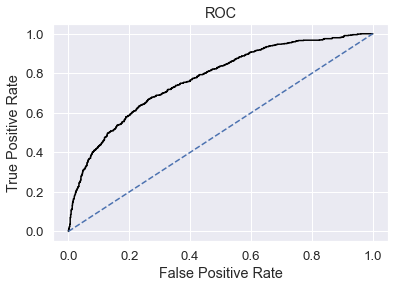

In [147]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">NN Model Performance Evaluation on Test data

In [148]:
confusion_matrix(test_labels,ytest_predict)

array([[544,  44],
       [165, 106]])

In [149]:
nn_test_acc=best_grid.score(X_test,test_labels)
nn_test_acc

0.7566938300349243

In [150]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       588
           1       0.71      0.39      0.50       271

    accuracy                           0.76       859
   macro avg       0.74      0.66      0.67       859
weighted avg       0.75      0.76      0.73       859



In [151]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.71
nn_test_recall  0.39
nn_test_f1  0.5


Area under Curve is 0.7783718653513065


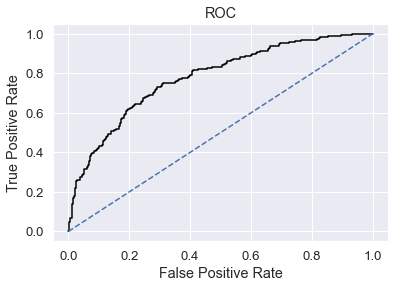

In [152]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

In [153]:
best_grid.score

<bound method ClassifierMixin.score of MLPClassifier(hidden_layer_sizes=100, max_iter=2500, random_state=1, tol=0.01)>

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Neural Network Conclusion

<b>Train Data:</b>  
    AUC: 77%        
    Accuracy: 75%          
    Precision: 69%        
    f1-Score: 52%     
            
<b>Test Data:</b>      
    AUC: 78%      
    Accuracy: 76%        
    Precision: 71%       
    f1-Score: 50%     
  
Training and Test set results are almost similar.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Final Conclusion

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Comparison of the performance metrics from the 3 models

In [154]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.76,0.77,0.76,0.76,0.75,0.76
AUC,0.77,0.79,0.82,0.81,0.77,0.78
Recall,0.49,0.51,0.44,0.42,0.41,0.39
Precision,0.66,0.69,0.72,0.71,0.69,0.71
F1 Score,0.56,0.59,0.54,0.53,0.52,0.50


### ROC Curve for the 3 models on the Training data

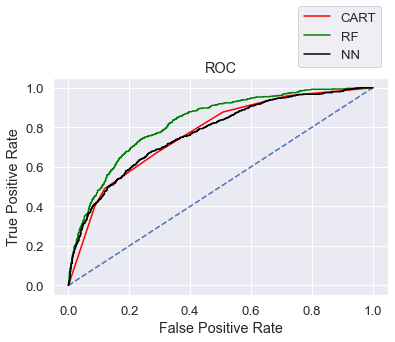

In [155]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### ROC Curve for the 3 models on the Test data

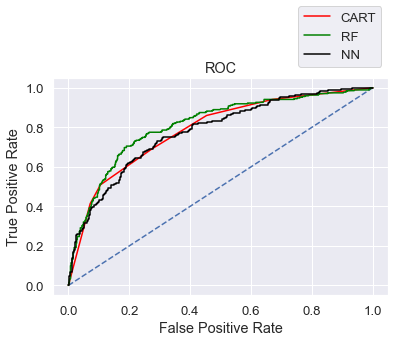

In [156]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

Out of the 3 models, Random Forest has slightly better performance than the Cart and Neural network model

Overall all the 3 models are reasonaly stable enough to be used for making any future predictions.
From Cart and Random Forest Model, Product Name is found to be the most useful feature amongst all other features for predicting claim status. 